In [1]:
import sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import *
from plot import LimitPlot

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Plot

In [2]:
nmc = 20

xsec_max_ary = np.zeros((5,nmc))
limit_ary = np.zeros((5,nmc))

for idm, dm in enumerate(tqdm_notebook([5,7,9,11,13])):
    plot_mc = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/DarkSky_sid_loc0_inj10_dm' + str(dm)+'/',
                        elephant=True, 
                        nmc=nmc, 
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="mc",
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=9,
                        TS1000=9,
                        elephantm = [11]) # 0 for 10 GeV
    limit_ary_temp, xsec_max_ary_temp = plot_mc.return_limits()
    
    xsec_max_ary[idm] = xsec_max_ary_temp[-1,11,:]
    limit_ary[idm] = limit_ary_temp[-1,11,:]
    
xsec_max = np.log10(np.percentile(xsec_max_ary, [16,50,84], axis=1))
lims = np.log10(np.percentile(10**limit_ary, [16,50,84], axis=1))

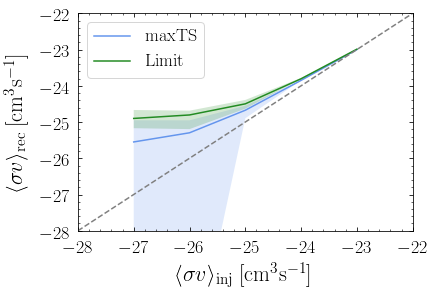

In [3]:
plt.plot(np.arange(-23,-28,-1),  xsec_max[1], label='maxTS')
plt.fill_between(np.arange(-23,-28,-1),  xsec_max[0], xsec_max[2], alpha=0.2)
plt.plot(np.arange(-23,-28,-1),  lims[1], label='Limit')
plt.fill_between(np.arange(-23,-28,-1),  lims[0], lims[2], alpha=0.2)
plt.plot([-28,-21],[-28,-21],ls='--', color='grey')
plt.xlabel("$\langle \sigma v \\rangle_\mathrm{inj}$ [cm$^3$s$^{-1}$]")
plt.ylabel("$\langle \sigma v \\rangle_\mathrm{rec}$ [cm$^3$s$^{-1}$]")
plt.ylim(-28,-22)
plt.xlim(-28,-22)
plt.legend()
plt.show()